# Analysis of noisy DEJMPS

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn
from scipy.optimize import fsolve

import main_1GnB as main

Erasure: same J, different p-->(1-alpha)p  =>  scale a,b,c,d by (1-alpha)

Depol.: different J-->J + beta(beta-2) * (J-0.25), same p => modify a,b, keep c,d

$$ a_\mathrm{depol} = (1+\beta(\beta-2))a - \frac{\beta(\beta-2)}{4}c$$
$$ b_\mathrm{depol} = (1+\beta(\beta-2))b - \frac{\beta(\beta-2)}{4}d$$

---
---
## Output fidelity and success probability

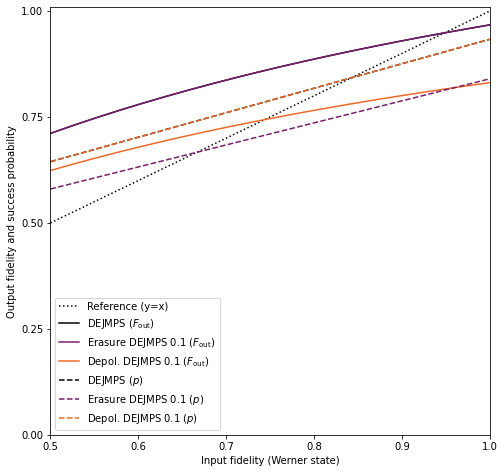

In [3]:
imp.reload(main)

prob_failure = 0.1
policy_names = ['DEJMPS', 'Erasure DEJMPS '+str(prob_failure), 'Depol. DEJMPS '+str(prob_failure)]

F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])
num_new_links = 5

main.policies_plot(policy_names, rho_new, num_new_links)

---
---
## Buffering performance

In [4]:
imp.reload(main)
main.AFplot_noisyDEJMPS_interactive()

interactive(children=(IntSlider(value=5, description='n', layout=Layout(width='60%'), max=15, min=1), FloatSli…

---
---
## Fixed availability A, with fixed $q=1$

In [20]:
n = 1

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
pur_after_swap = False

# NOISE
Gamma = 0.02

# CONS
p_cons = 0.1

# Experiment
colors = ['tab:blue', 'tab:orange']
savefig = True

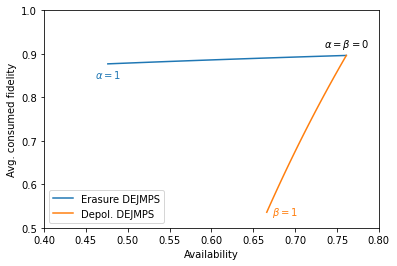

In [21]:
## THEORY ##

imp.reload(main)

q_purif = 1
noise_vec = np.linspace(0,1,50)
_policy_names = ['Erasure DEJMPS ', 'Depol. DEJMPS ']
Fcons_vecs = [[None for _ in noise_vec] for _ in _policy_names]
A_vecs = [[None for _ in noise_vec] for _ in _policy_names]

for idx_policy, _policy_name in enumerate(_policy_names):
    for idx_noise, noise in enumerate(noise_vec):
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                main.policy_label_to_function(_policy_name+str(noise)),
                                                pur_after_swap, Gamma, p_cons)
        Fcons_vecs[idx_policy][idx_noise] = Fcons
        A_vecs[idx_policy][idx_noise] = A

## PLOT ##
for idx_policy, _policy_name in enumerate(_policy_names):
    plt.plot(A_vecs[idx_policy], Fcons_vecs[idx_policy], color=colors[idx_policy],
             label=_policy_name[:-1])

plt.xlim([0.4,0.8])
plt.ylim([0.5,1])

plt.xlabel(r'Availability')
plt.ylabel(r'Avg. consumed fidelity')
plt.legend(loc='lower left')
plt.text(A_vecs[0][0], Fcons_vecs[0][0]*1.01, r'$\alpha=\beta=0$',
         horizontalalignment='center', verticalalignment='bottom')
plt.text(A_vecs[0][-1], Fcons_vecs[0][-1]*0.99, r'$\alpha=1$',
         horizontalalignment='center', verticalalignment='top',
         color=colors[0])
plt.text(A_vecs[1][-1]*1.01, Fcons_vecs[1][-1], r'$\beta=1$',
         horizontalalignment='left', verticalalignment='center',
         color=colors[1])

if savefig:
    filename = 'figs/noisyDEJMPS-q1-n%d-pg%.3f-rho00%.3f-rho11%.3f-rho22%.3f-Gamma%.3f-pc%.3f.pdf'%(n,
                p_gen, rho_new[0][0], rho_new[1][1], rho_new[2][2], Gamma, p_cons)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()